# **AutoGrad**
PyTorch's autograd is a core feature for automatic differentiation. It uses a dynamic computation graph to compute gradients for optimization tasks in deep learning. The computation graph is created dynamically during the forward pass and records operations on tensors with requires_grad=True.

Key points about autograd and computation graph:

1. **Dynamic Graph:** The graph is built on-the-fly as operations are executed, making it flexible for dynamic models.
2. **Nodes and Edges:**
- Nodes: Represent operations or variables.
- Edges: Represent the flow of data (dependencies) between operations.
3. **Backward Propagation:** The graph is traversed in reverse during the backward pass, calculating gradients using the chain rule.
4. **Gradient Storage:** Gradients of tensors are stored in their .grad attribute after backward() is called.


Here's how autograd works:
1. Perform forward computation on tensors (e.g., matrix multiplication, addition).
2. Call .backward() on a scalar output tensor to compute gradients.
3. Use the gradients for parameter updates (e.g., in an optimizer).

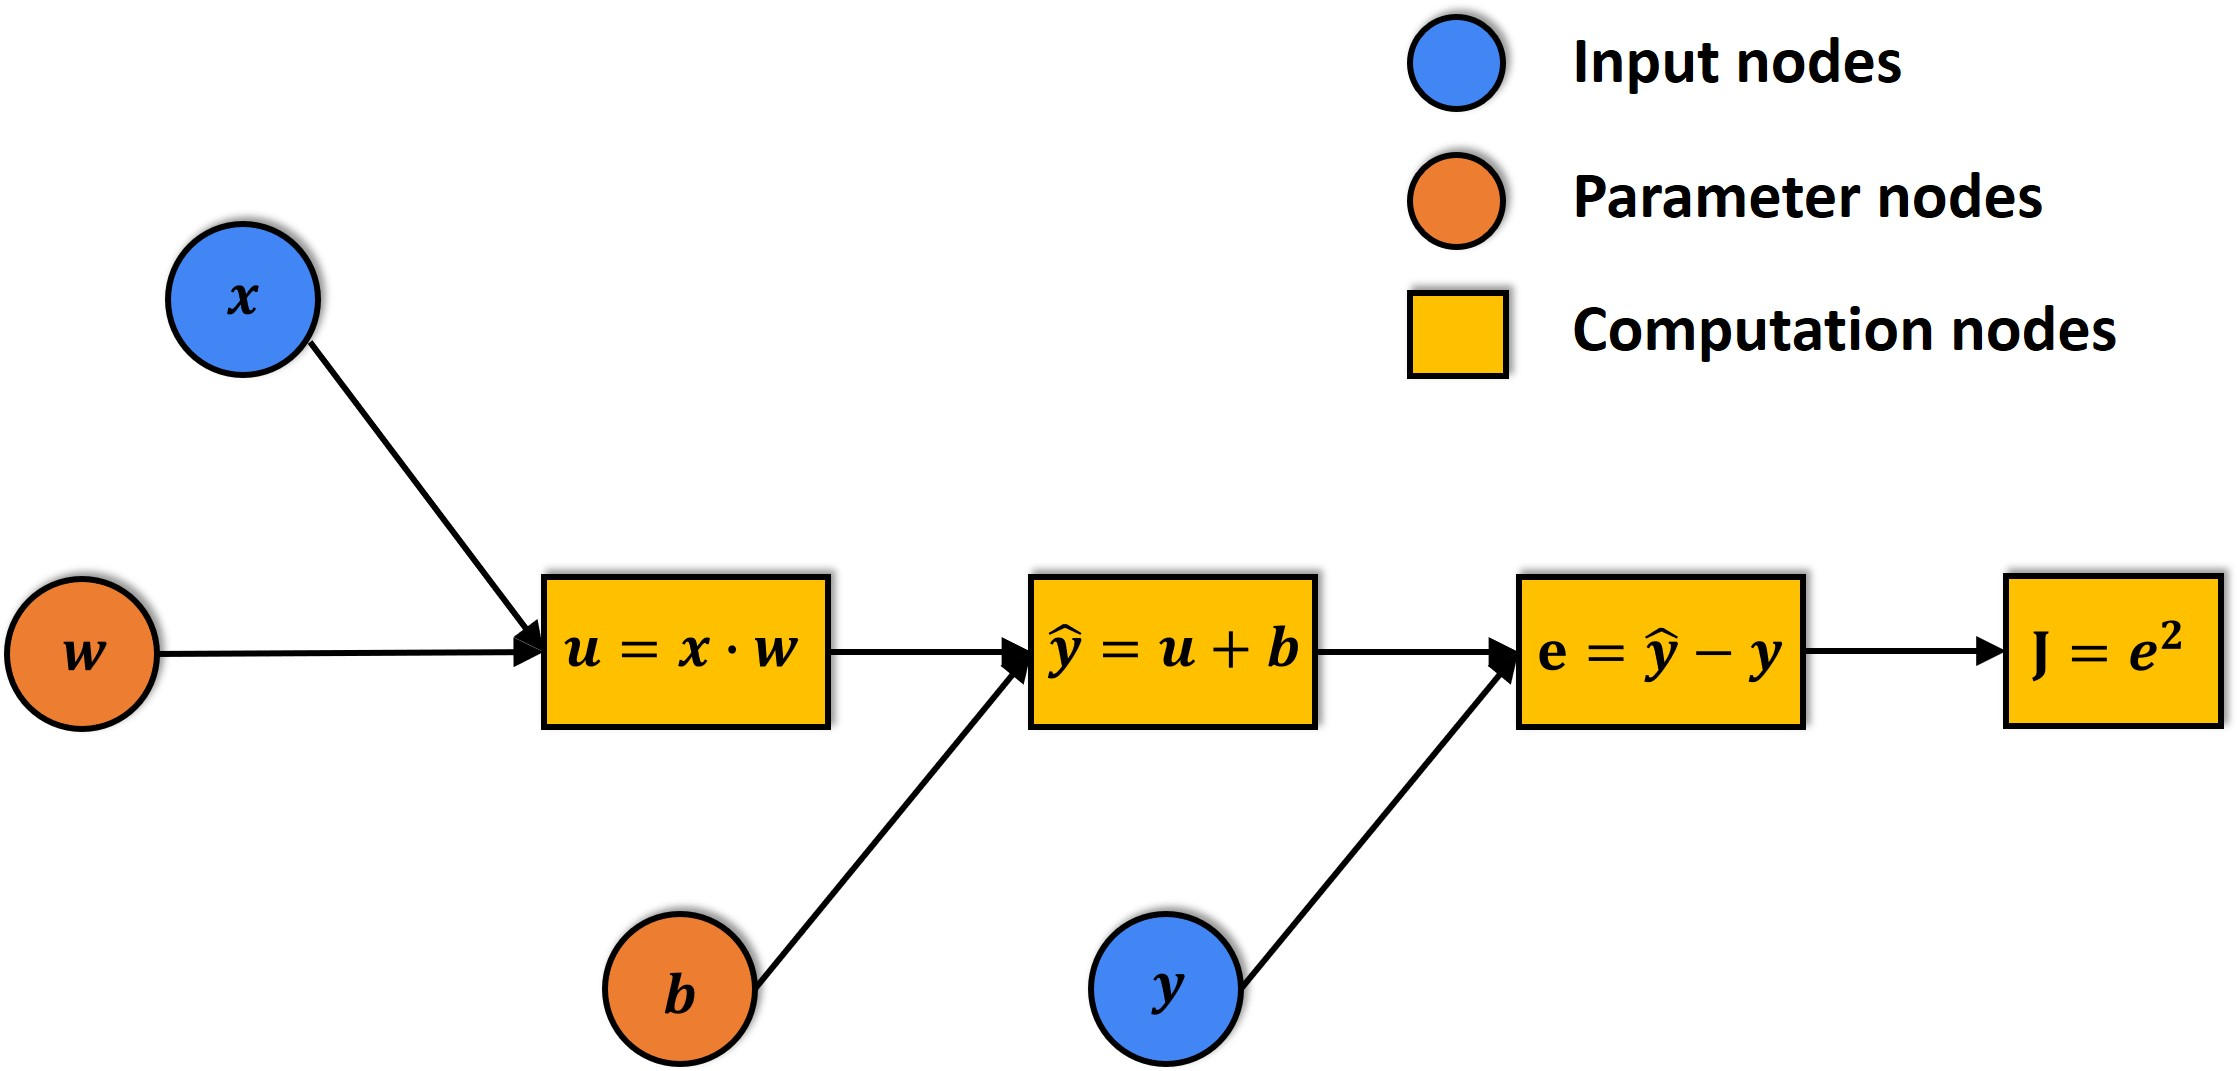

### Simple Derviative for AutoGrad

In [9]:
# Manual derivative function for y = x^2
def dy_dx(x):
  y = 2*x
  print(y)

dy_dx(3)

6


#### Auto Grad help us to calculate the derivative of any give equation or function we dont have to write the derivative function manually

#### Forward Propgation in AutoGrad

In [2]:
import torch

In [3]:
x = torch.tensor(3.0 , requires_grad=True) # This requires_grad automatically tell the we are goind to perform the derivative of x


In [4]:
y = x**2 # Takes square of x

In [5]:
y

tensor(9., grad_fn=<PowBackward0>)

In [6]:
x

tensor(3., requires_grad=True)

#### Backward Propgation in AutoGrad

In [7]:
y.backward()  # what this function do that it calculate the derivative of y = x^2 which will be y=2x if x =3 then y = 2(3) = 6

In [8]:
x.grad

tensor(6.)

### Complex Function

In [12]:
# now we make the function a bit complex
# y = x^2 and z=sin(y)
# and we want to calculate the dz/dx ...for that we have to apply chain rule and first calculate dz/dy * dy/dx where dz/dy = cos(y) and dy/dx = 2x  and if we put value of y in dz/dy  = cos(x^2)

import math
def dz_dx(x):
  return 2*x* math.cos(x**2)

dz_dx(3)

-5.466781571308061

### Now we implement the same derivative using Adagrad


##### Forward Propgation in AutoGrad




In [13]:
x = torch.tensor(3.0 , requires_grad=True)

In [14]:
y = x**2

In [15]:
z=torch.sin(y)

In [16]:
x

tensor(3., requires_grad=True)

In [17]:
y

tensor(9., grad_fn=<PowBackward0>)

In [18]:
z

tensor(0.4121, grad_fn=<SinBackward0>)

#### Backward Propgation in AutoGrad

In [19]:
z.backward()

In [21]:
x.grad

tensor(-5.4668)

In [ ]:
# We can only apply the grad on leaf derivative autograd donot give anyoption to check grad of dy/dx or middle

## Now we implement the below complex function

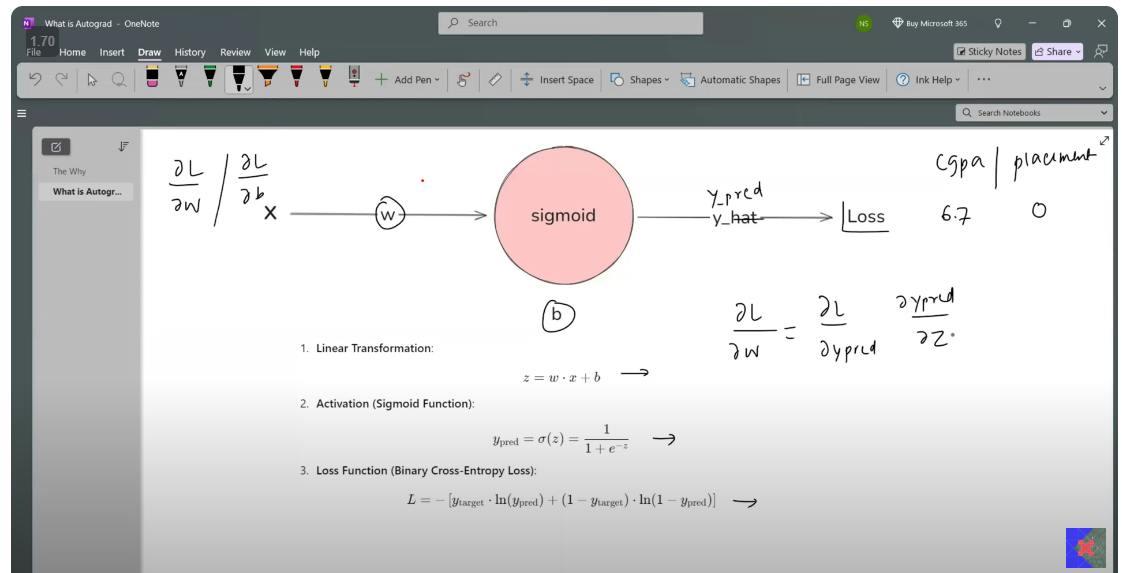

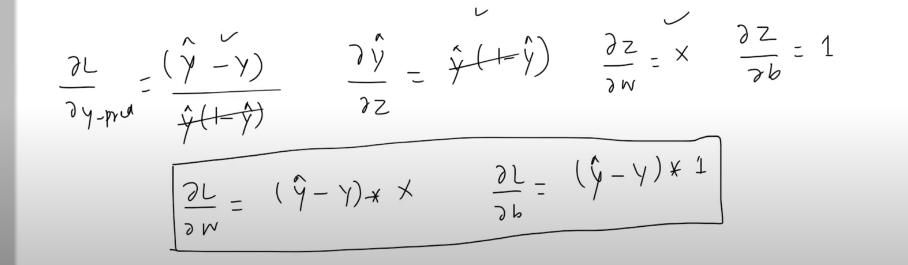

In [30]:
x =torch.tensor(6.7) # inpurt feature or CGPA
y= torch.tensor(0.0) # Actual value (Binary)

w= torch.tensor(1.0) # weights
b= torch.tensor(0.0) # Bais

In [31]:
# Binary Cross-Entropy Loss for scalar ( as the equation is mentioned in above picture)
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [32]:
# Forward pass

z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [33]:
loss

tensor(6.7012)

In [34]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [35]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


## Doing it with AUtoGrad Now

#### Forward Propogation in AUtoGrad

In [36]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [37]:
w

tensor(1., requires_grad=True)

In [38]:
b

tensor(0., requires_grad=True)

In [39]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [41]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [42]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

#### Backward Propgation in AutoGrad




In [43]:
loss.backward()

In [44]:
w.grad

tensor(6.6918)

In [45]:
b.grad

tensor(0.9988)

## Implementation of AutoGrad on tensors


In [47]:
x = torch.tensor([1.0,2.0,3.0], requires_grad = True)

In [50]:
y=(x**2).mean()

In [51]:
y.backward()

In [52]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

# Clearing Gradient is require when you have multiple times done forward and backpropogration

In [65]:
x = torch.tensor(2.0 , requires_grad=True)
x

tensor(2., requires_grad=True)

In [66]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [67]:
y.backward()

In [68]:
x.grad

tensor(4.)

In [69]:
x.grad.zero_() # clearing gradient

tensor(0.)

In [70]:
# option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [71]:
x.requires_grad_(False)


tensor(2.)

In [72]:
x

tensor(2.)

In [73]:
y = x ** 2
y

tensor(4.)

In [74]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [75]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [76]:
z = x.detach()
z

tensor(2.)

In [77]:
y = x ** 2

In [78]:
y

tensor(4., grad_fn=<PowBackward0>)

In [79]:
y1 = z ** 2
y1

tensor(4.)

In [80]:
y.backward()

In [81]:
y1.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn